In [1]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# load spacy model
#nlp = spacy.load('en_core_web_sm')

# define function to preprocess text
#def preprocess_text(text):
    #doc = nlp(text)
    #return ' '.join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

# read in bill texts from CSV file
billsdf = pd.read_csv('../Data/bill_text_df.csv')


In [2]:
billsdf['Raw Text'] = billsdf['Raw Text'].astype(str)

In [3]:
billsdf = billsdf[billsdf['Bill Number'].str.endswith('enr')]

In [4]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
from sumy.utils import get_stop_words


In [5]:
def summarize_text(text, num_sentences):
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summarizer = LexRankSummarizer()
    summarizer.stop_words = get_stop_words("english")
    summary = summarizer(parser.document, num_sentences)
    summary = [str(sent) for sent in summary]
    return ' '.join(summary)


In [6]:

# apply the summarize function to each row of the 'text' column
num_sentences = 5
billsdf['summary'] = billsdf['Raw Text'].apply(lambda x: summarize_text(x, num_sentences))


In [7]:
billsdf.to_csv('../Data/summarized_bills.csv')

In [17]:
import pandas as pd

# Assuming your dataframe is called df
billsdf['length_raw'] = billsdf['Raw Text'].apply(lambda x: len(str(x)))
billsdf['length_summary'] = billsdf['summary'].apply(lambda x: len(str(x)))


In [18]:
billsdf_filtered = billsdf[billsdf['length_summary'] < billsdf['length_raw']]


In [19]:
billsdf_filtered.to_csv('../Data/shorter_summaries.csv')

In [9]:
import textstat
import numpy as np

In [10]:
full_text = billsdf['Raw Text']

autoreadfull = []

for bill in full_text:
    a = textstat.automated_readability_index(bill)
    autoreadfull.append(a)

print("Readibility score for full bill is ", np.mean(autoreadfull))

Readibility score for full bill is  31.06842105263158


In [11]:
summary_text = billsdf['summary']

autoreadsum = []

for bill in summary_text:
    a = textstat.automated_readability_index(bill)
    autoreadsum.append(a)

print("Readibility score for summarized bill is ", np.mean(autoreadsum))

Readibility score for summarized bill is  31.36776315789474


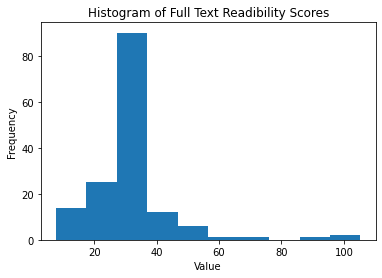

In [15]:
import matplotlib.pyplot as plt

plt.hist(autoreadfull, bins=10)
plt.title('Histogram of Full Text Readibility Scores')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


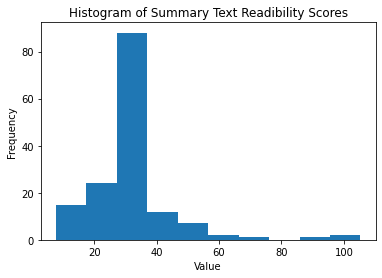

In [16]:
plt.hist(autoreadsum, bins=10)
plt.title('Histogram of Summary Text Readibility Scores')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()